In [97]:
import h5py
import matplotlib.pyplot as plt
import numpy
from matplotlib.pyplot import figure

from functional import *

In [98]:
# Set damping factor to get lifetime broadening
DAMP = 0.01

In [99]:
# Pass in binary file name and the path to which the data are stored in
def read_dataset(fname, path):
    f = h5py.File(fname)
    return numpy.array(f[path])

In [100]:
# Raw data
time = read_dataset('water_RT_x.bin', "RT/TIME")
ux = read_dataset('water_classical_x_0p0001.bin', "RT/LEN_ELEC_DIPOLE")[:,0]
uy = read_dataset('water_classical_y_0p0001.bin', "RT/LEN_ELEC_DIPOLE")[:,1]
uz = read_dataset('water_classical_z_0p0001.bin', "RT/LEN_ELEC_DIPOLE")[:,2]

<ipython-input-99-7d4ed873fb7f>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(fname)


In [101]:
ux.shape

(12401,)

In [102]:
dt = time[1] - time[0]

In [103]:
signals = [ux, uy, uz]

In [104]:
# Fourier transformed spectra
spects = []
freq = None
for s in signals:
    s -= s[0]
    s *= np.exp(-DAMP*time)
    #w, f = fourier_tx(s, dt, 0)
    w, f = pade_tx(s, dt, (0,5))
    freq = w
    spects.append(f)

In [105]:
spects

[array([-1.05398877e-03+0.00000000e+00j, -1.05398924e-03-3.66957489e-08j,
        -1.05399063e-03-7.33925883e-08j, ...,
         4.33420218e-05+5.18792175e-06j,  4.33332938e-05+5.18735518e-06j,
         4.33245659e-05+5.18678863e-06j]),
 array([-6.90593908e-04+0.00000000e+00j, -6.90594163e-04-2.66420534e-08j,
        -6.90594928e-04-5.32685177e-08j, ...,
         4.54108532e-05+5.41476542e-06j,  4.54018319e-05+5.41415007e-06j,
         4.53928133e-05+5.41353611e-06j]),
 array([-3.13175887e-04-0.00000000e+00j, -3.13176035e-04-1.15642852e-08j,
        -3.13176482e-04-2.31288845e-08j, ...,
         5.01997318e-05+5.99415075e-06j,  5.01896534e-05+5.99344436e-06j,
         5.01795786e-05+5.99273823e-06j])]

In [106]:
total = sum([f.imag for f in spects]) / 3
total *= -freq

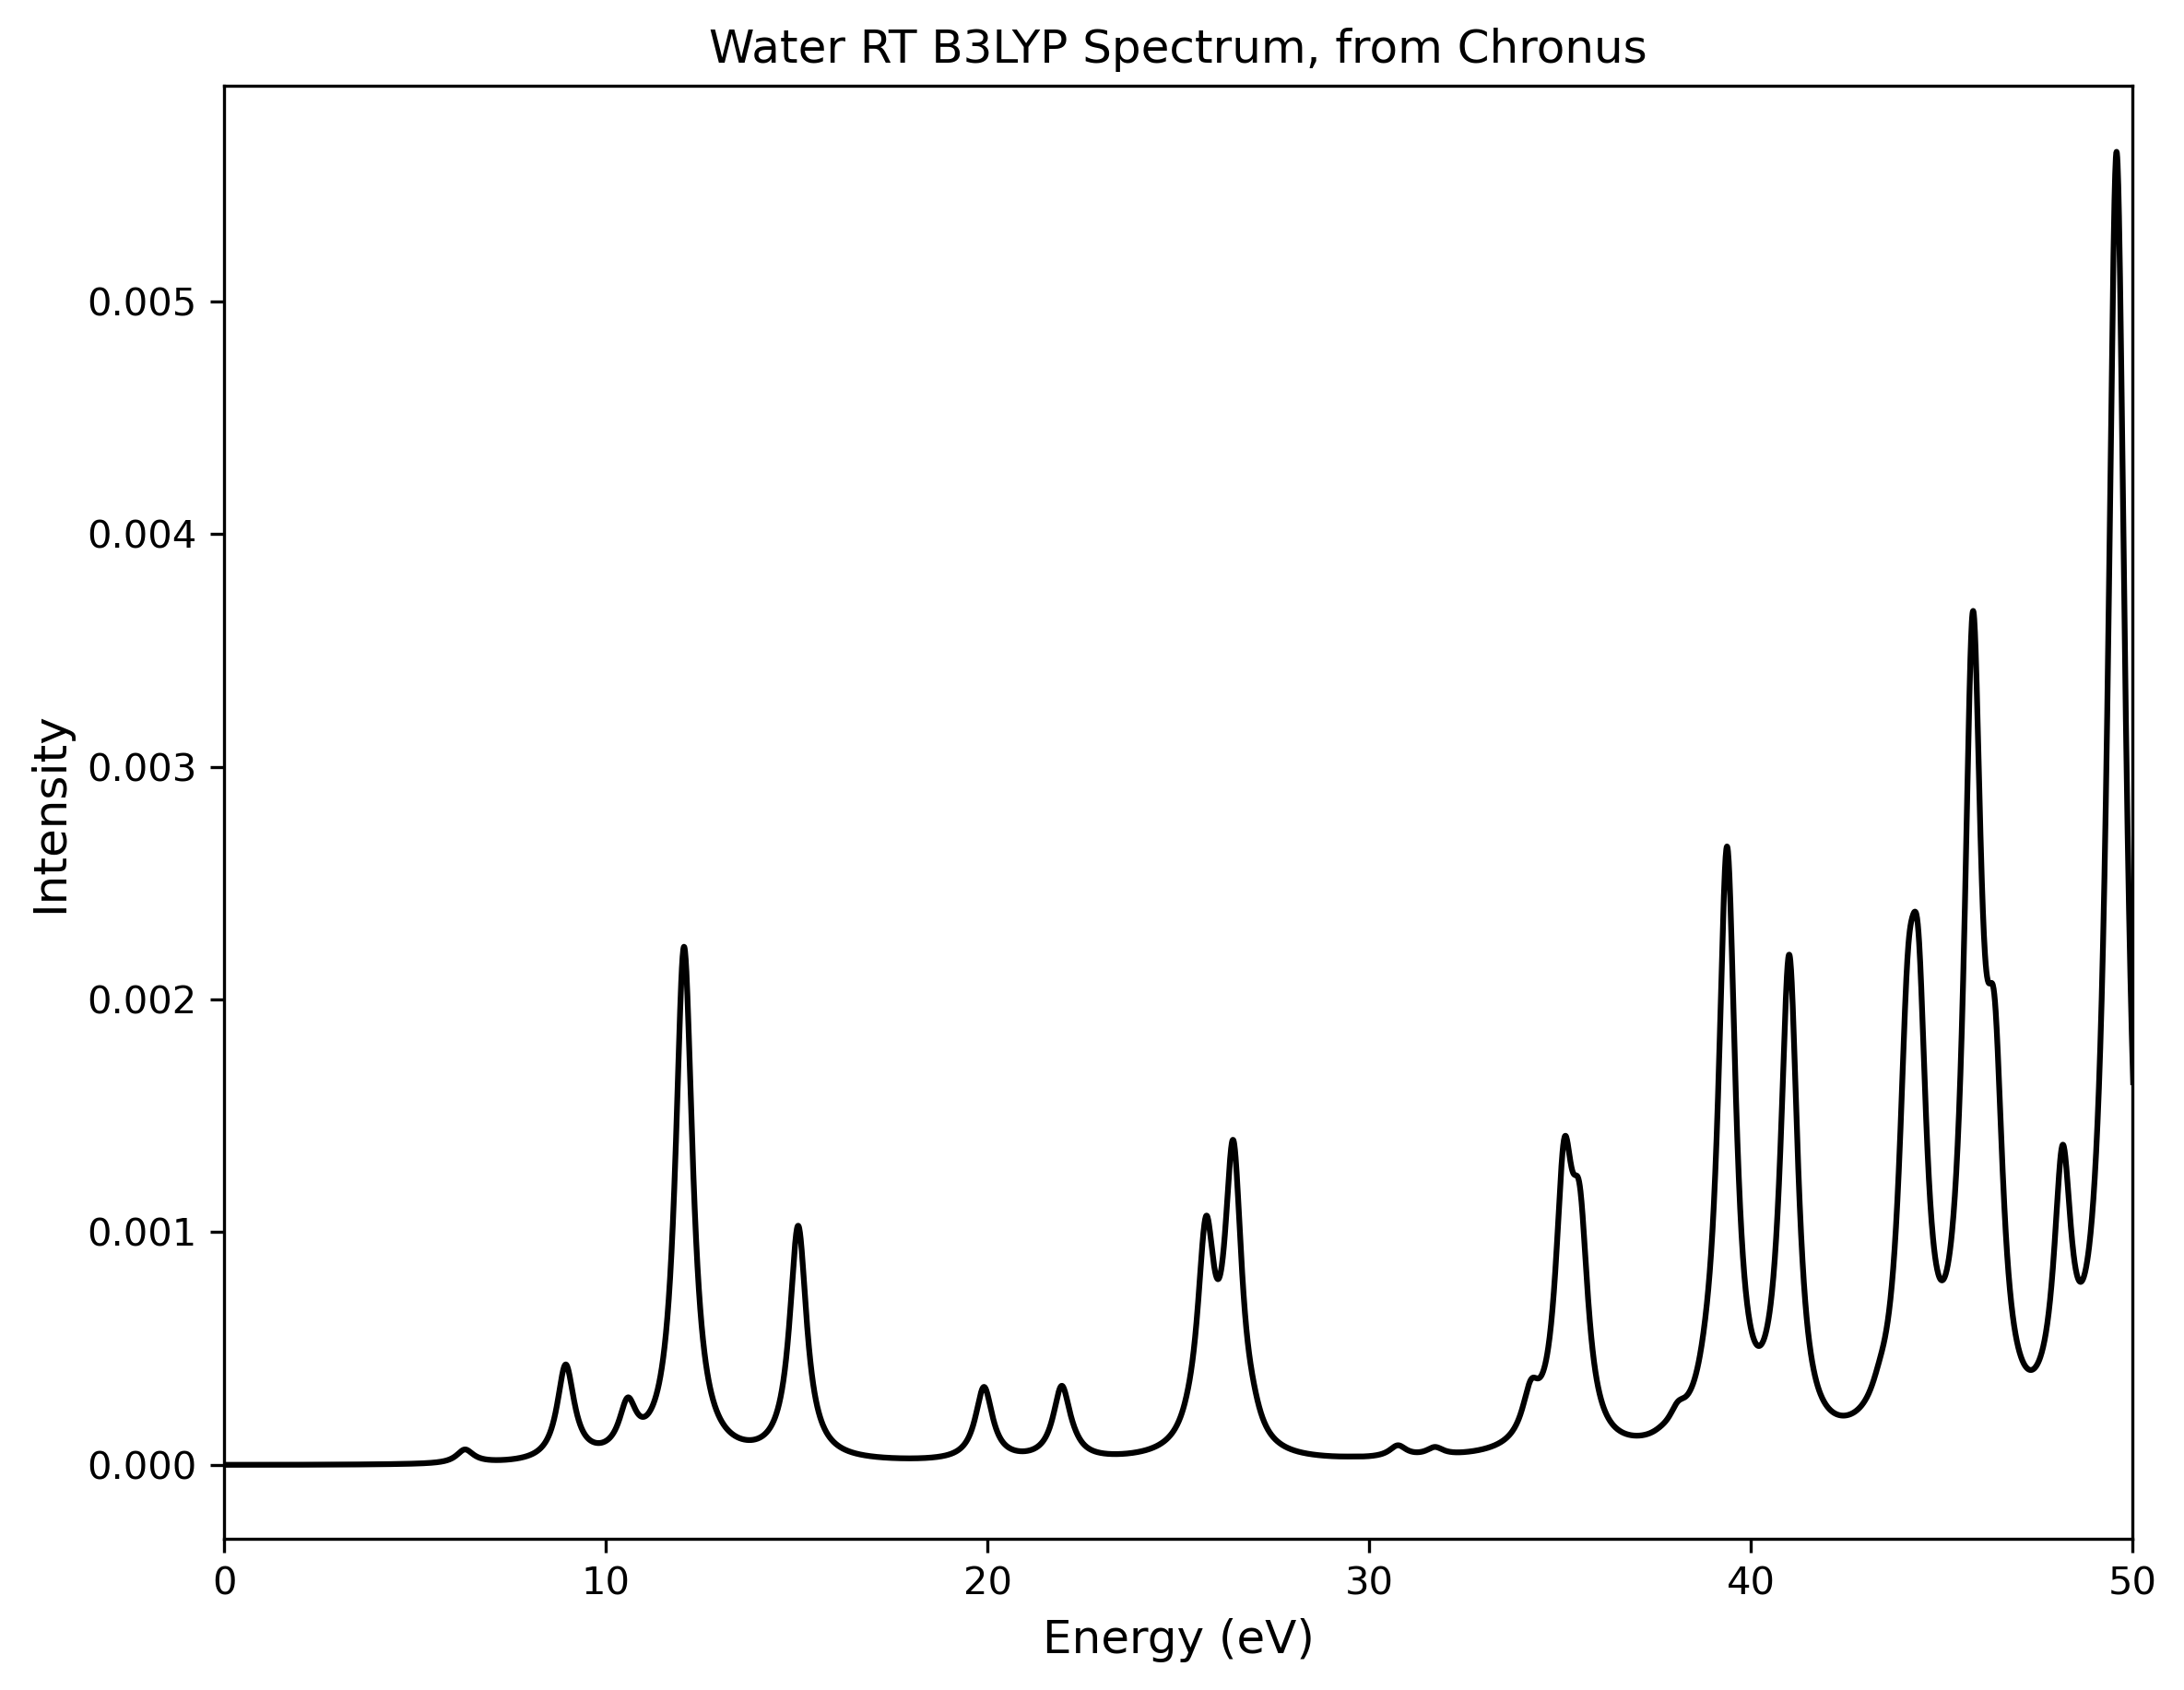

In [107]:
# Plotting
figure(figsize = (8, 6), dpi=300)
plt.plot(freq*27.2114, total, c='k')
plt.xlim(0,50)
#plt.ylim(0,0.175)
plt.ylabel("Intensity", fontsize=12)
plt.xlabel("Energy (eV)", fontsize=12)
plt.tight_layout()
plt.title("Water RT B3LYP Spectrum, from Chronus")
#plt.savefig("water_fourier_thin.pdf")
plt.show()